# Week 13
# GroupBy Mechanics

Many data processing follows a **split-apply-combine** process. For example, you may want to do the following operations to analyze a dataset about sales:
1. What is the total revenue of each day?
2. What is the total sales of each product?
3. How much has each client purchased in total?

These operations all requires that you split the data into groups, and then apply certain calculations to each of the groups, and finally combine all results into a new table. In Pandas this is mostly done with `groupby()` function.

**Readings**
- Textbook, Chapter 10

In [1]:
import numpy as np
import pandas as pd

In [2]:
# An example:
df = pd.DataFrame({'Name' : ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
                   'Course' : ['Programming', 'Programming', 'Programming','Data Structure', 'Data Structure','Data Structure',],
                   'Semester': ['Spring 2019', 'Fall 2019', 'Fall 2019', 'Spring 2019', 'Fall 2019', 'Spring 2019'],
                   'Homework' : np.random.randint(60, 100, size=6),
                   'Exam' : np.random.randint(60, 100, size=6)})
df

,Name,Course,Semester,Homework,Exam
0,Alice,Programming,Spring 2019,72,89
1,Bob,Programming,Fall 2019,86,63
2,Charlie,Programming,Fall 2019,69,85
3,Alice,Data Structure,Spring 2019,75,75
4,Bob,Data Structure,Fall 2019,87,68
5,Charlie,Data Structure,Spring 2019,73,98


In [3]:
# Split exam scores according to name
groups = df['Exam'].groupby(df['Name'])

groups

In [4]:
# Apply mean() function to find the average value for each group
means = groups.mean()

means

Name
Alice      82.0
Bob        65.5
Charlie    91.5
Name: Exam, dtype: float64

We obtain a **data series**. It can be converted to a data frame by `to_frame()` method.

In [5]:
# A common practice is to convert the results to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

,Average Exam Score
Name,
Alice,82.0
Bob,65.5
Charlie,91.5


In [6]:
# Put all operations in one statement
df_means = df['Exam'].groupby(df['Name']).mean().to_frame(name="Average Exam Score")

df_means

,Average Exam Score
Name,
Alice,82.0
Bob,65.5
Charlie,91.5


In [10]:
# Exercise: Find the average homework score and exam score for each course

df[['Homework', 'Exam']].groupby(df['Course']).mean()
# The result is already a data frame because they come from more than 1 columns.

,Homework,Exam
Course,,
Data Structure,78.333333,80.333333
Programming,75.666667,79.000000


## Split Data with Multiple Columns

We can use more than one column as keys to split data into groups.

In [11]:
# Split the exam scores according to both course name and semester.
groups = df['Exam'].groupby([df['Course'], df['Semester']])

In [13]:
# Calculate the average score
means = groups.mean()

means

Course          Semester   
Data Structure  Fall 2019      68.0
                Spring 2019    86.5
Programming     Fall 2019      74.0
                Spring 2019    89.0
Name: Exam, dtype: float64

In [14]:
groups2 = df['Exam'].groupby([df['Semester'], df['Course']])
means2 = groups2.mean()
means2

Semester     Course        
Fall 2019    Data Structure    68.0
             Programming       74.0
Spring 2019  Data Structure    86.5
             Programming       89.0
Name: Exam, dtype: float64

In [15]:
# Convert the result to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

Average Exam Score
Course         Semester                       
Data Structure Fall 2019                  68.0
               Spring 2019                86.5
Programming    Fall 2019                  74.0
               Spring 2019                89.0

`means` is a data series with **hierarchical indexing**. It can be converted to a data frame using `unstack()`.

In [16]:
means.index

MultiIndex([('Data Structure',   'Fall 2019'),
            ('Data Structure', 'Spring 2019'),
            (   'Programming',   'Fall 2019'),
            (   'Programming', 'Spring 2019')],
           names=['Course', 'Semester'])

In [17]:
means.unstack() # unstack() converts a data series with multiple index into a data frame

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,68.0,86.5
Programming,74.0,89.0


We can specify which index to be unstacked.

In [18]:
means.unstack(level=0)

Course,Data Structure,Programming
Semester,,
Fall 2019,68.0,74.0
Spring 2019,86.5,89.0


In [19]:
means.unstack(level=1)

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,68.0,86.5
Programming,74.0,89.0


In [20]:
# Exercise:
# Using one statement, create the above data frame directly from df.

df['Exam'].groupby([df['Course'], df['Semester']]).mean().unstack()

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,68.0,86.5
Programming,74.0,89.0


We can split the entire data set instead of one column.

In [21]:
df.groupby([df['Course'], df['Semester']]).mean()

Homework  Exam
Course         Semester                   
Data Structure Fall 2019        87.0  68.0
               Spring 2019      74.0  86.5
Programming    Fall 2019        77.5  74.0
               Spring 2019      72.0  89.0

In [22]:
# Frequently the grouping information is found in the same data frame as the data 
# you want to work on. In that case, simply put column names as the keys:
df.groupby(['Course', 'Semester']).mean()

Homework  Exam
Course         Semester                   
Data Structure Fall 2019        87.0  68.0
               Spring 2019      74.0  86.5
Programming    Fall 2019        77.5  74.0
               Spring 2019      72.0  89.0

Besides `mean()`, there are several other functions we can apply to the groups. See [this article](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/).

In [26]:
# Exercise:
# Use `size()` method to find the number of students for each course 
# in each semester

# df.groupby(['Course', 'Semester']).size().to_frame(name='Number of Students')
df.groupby(['Course', 'Semester']).count() # Show the number of values in each column

Name  Homework  Exam
Course         Semester                         
Data Structure Fall 2019       1         1     1
               Spring 2019     2         2     2
Programming    Fall 2019       2         2     2
               Spring 2019     1         1     1

## Iterating Over Groups

The GroupBy object support iteration, providing a sequence of 2-tuples containing the group name along with the data.

In [35]:
# Show the content of each group.
groups = df.groupby('Name')

for name, group in groups:
    print("Name:", name)
    print("Shape:", group.shape)
    print(group)

Name: Alice
Shape: (2, 5)
    Name          Course     Semester  Homework  Exam
0  Alice     Programming  Spring 2019        72    89
3  Alice  Data Structure  Spring 2019        75    75
Name: Bob
Shape: (2, 5)
  Name          Course   Semester  Homework  Exam
1  Bob     Programming  Fall 2019        86    63
4  Bob  Data Structure  Fall 2019        87    68
Name: Charlie
Shape: (2, 5)
      Name          Course     Semester  Homework  Exam
2  Charlie     Programming    Fall 2019        69    85
5  Charlie  Data Structure  Spring 2019        73    98


**Syntactic sugar**: It is simpler to use the following statement for selecting columns for groupby()

In [28]:
df.groupby('Name')['Exam'].mean()

Name
Alice      82.0
Bob        65.5
Charlie    91.5
Name: Exam, dtype: float64

In [29]:
# The standard statement
df['Exam'].groupby(df['Name']).mean()

Name
Alice      82.0
Bob        65.5
Charlie    91.5
Name: Exam, dtype: float64

In [31]:
# The following statement does not work because 
# 'Name' is not a column in df['Exam']

# df['Exam'].groupby('Name').mean() # This is a mistake

In [32]:
# Exercise:
# Use the simplified groupby expression to find the average homework scores of each semester.

df.groupby('Semester')['Homework'].mean()

Semester
Fall 2019      80.666667
Spring 2019    73.333333
Name: Homework, dtype: float64

## **Grouping with dictionary**
We can use a seperate dictionary to decide the groups.

In [ ]:
df

In [ ]:
genders = {
    "Alice": "Female",
    "Bob": "Male",
    "Charlie": "Male"
}

In [ ]:
data = df.set_index("Name")

data

In [ ]:
# Split the data according to gender
data.groupby(genders).size()

In [ ]:
for gender, group in data.groupby(genders):
    print("Gender:", gender)
    print(group)

In [ ]:
# One can also use a list to indicate the grouping information
# Not recommended because it is hard to understand
genders = ['F', 'M', 'M', 'F', 'M', 'M']

data.groupby(genders).size()

In [ ]:
# Exercise: Calculate the average scores for each gender
data.groupby(genders).mean()

## Grouping with functions

Any function passed as a group key will be called once per index value, with the returned values being used as the group names.

In [ ]:
def get_initial(name):
    return name[0]

In [ ]:
get_initial("Liang")

In [ ]:
data.groupby(get_initial).mean()

In [ ]:
# The function can be defined via lambda expression
data.groupby(lambda x: x[0]).mean()

## Example: The MovieLens Dataset

In [37]:
# Let's use a large movielens dataset.
import urllib
import zipfile
url = "https://files.grouplens.org/datasets/movielens/ml-latest.zip"
file_name = "data/ml-latest.zip"
urllib.request.urlretrieve(url, file_name)
zip_file = zipfile.ZipFile(file_name, 'r')
zip_file.extractall('data')

In [39]:
# Inspect the extracted folder
import os
os.listdir('data/ml-latest/')

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

In [40]:
# There are two new files. Let's have a look.
scores = pd.read_csv('data/ml-latest/genome-scores.csv')
scores.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [41]:
# These tags show the features of each movie. Not relavant to what we want to do.
tags = pd.read_csv('data/ml-latest/genome-tags.csv')
tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [42]:
movies = pd.read_csv('data/ml-latest/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [43]:
ratings = pd.read_csv('data/ml-latest/ratings.csv')
ratings.shape

(27753444, 4)

In [50]:
# Find out how many ratings there are for "Pulp Fiction"

# Find the movie ID for "Pulp Fiction"
result = movies[movies['title'].str.contains("Pulp Fiction")]
print(result)

movie_id = 296

ratings_subset = ratings[ratings['movieId'] == movie_id]
ratings_subset.shape

     movieId                title                       genres
293      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller


(92406, 4)

<AxesSubplot:>

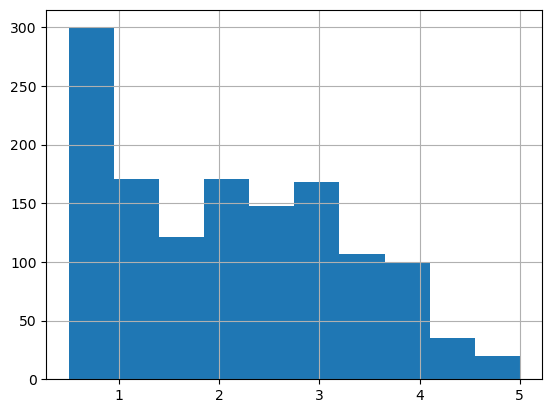

In [59]:
# Let's illustrate the rating distribution as a histogram.
ratings_subset['rating'].hist()

       movieId                       title                    genres
15548    78893  Last Airbender, The (2010)  Action|Adventure|Fantasy
(1341, 4)


<AxesSubplot:>

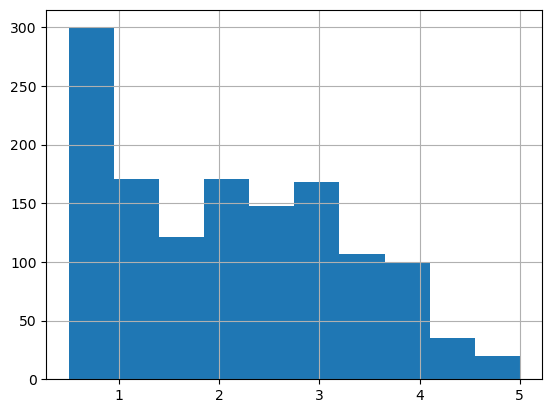

In [56]:
name = "Last Airbender"
result = movies[movies['title'].str.contains(name)]
print(result)

movie_id = 78893
ratings_subset = ratings[ratings['movieId'] == movie_id]
print(ratings_subset.shape)

ratings_subset['rating'].hist()

<AxesSubplot:>

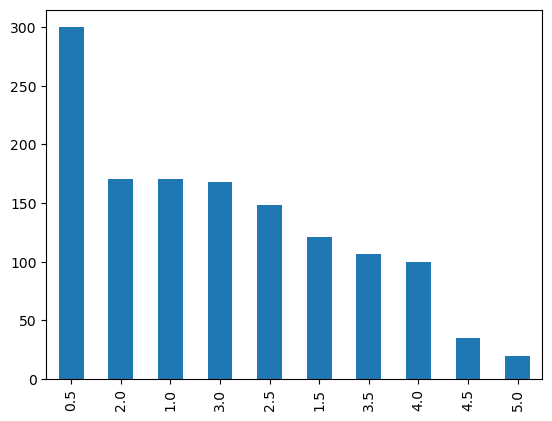

In [60]:
ratings_subset['rating'].value_counts().plot.bar()

In [63]:
tags.columns

Index(['tagId', 'tag'], dtype='object')

In [64]:
# This movie looks bad. What can we know about this movie?
scores_subset = scores[scores['movieId'] == movie_id]
print(scores_subset)

          movieId  tagId  relevance
11562000    78893      1    0.04100
11562001    78893      2    0.03175
11562002    78893      3    0.02750
11562003    78893      4    0.03300
11562004    78893      5    0.05375
...           ...    ...        ...
11563123    78893   1124    0.11300
11563124    78893   1125    0.04525
11563125    78893   1126    0.00875
11563126    78893   1127    0.11400
11563127    78893   1128    0.01175

[1128 rows x 3 columns]


In [68]:
scores_subset.sort_values('relevance', ascending=False).merge(tags, on='tagId').head(10)

,movieId,tagId,relevance,tag
0,78893,521,0.95050,horrible
1,78893,111,0.90775,based on a tv show
2,78893,97,0.84125,bad acting
3,78893,377,0.83675,fantasy
4,78893,132,0.82100,big budget
5,78893,951,0.81350,special effects
6,78893,742,0.79225,original
7,78893,100,0.78475,bad plot
8,78893,807,0.77825,predictable
9,78893,406,0.77600,franchise
